# Pluie radar COMEPHORE - Cumul
Codage 100% python (ne nécessite pas de SIG, à part pour générer le fichier BV avec la bonne projection) - Python 3

Données radar Météo France : https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=103&id_rubrique=34

- Ce script traite tous les fichiers gtif contenu dans le dossier choisi (par exemple une année entière, avec 1 fichier par heure)
- Pour chaque pas de temps (chaque fichier raster), la lame moyenne est calculée pour les pixels à l'intérieur du fichier vecteur fourni
- la série chronologique des lames horaires est enregistrée dans un fichier texte au format du logiciel GRP: 2 colonnes, date (yymmddhh) et Pluie en mm, avec un séparateur point-virgule

### 1) Lecture des fichiers raster horaires et calcul des lames d'eau horaires (moyennes des pixels) pour le polygone fourni
Exécutez la cellule ci-après pour lire les fichiers raster et construire en mémoire la série chronologique des lames d'eau horaires

ATTENTION: le résultat ne sera sauvegardé qu'après l'exécution de la cellule suivante du notebook
- Définir le dossier contenant les fichiers raster gtif fournis par Météo France (1 fichier par heure, avec un nom au format 'yymmddhh_RR.txt'):  par exemple: raster_folder = r'X:\3-....'
- Définir le dossier contenant le fichier vecteur. Par exemple:  vector_folder = r'X:\3-....'. NB: en cas de polygones multiples, seul le premier est utilisé.
- Définir le nom du fichier vecteur (shape par exemple) contenant le polygone sur lequel calculer la lame d'eau. Par exemple:  vector_file = 'BV_Laye.shp' <b>ATTENTION:</b> le système de coordonnées (crs) du fichier vecteur doit être celui des fichier rasters de Météo France (pour le connaitre il suffit d'ouvrir un fichier raster dans QGis et de faire 'clic droit sur la couche raster > Propriétés > Informations > CRS'
- Lancez l'exécution et soyez patient. La fin du traitement est signalée par l'affichage du temps de calcul (10 minutes environ pour une année entière). 

In [15]:
"""
Created on Aug 2020
@author: Loïc Duffar
"""
import os
import timeit
import rasterio as rio

start = timeit.default_timer()
print('Traitement en cours... attendez plusieurs minutes le message de fin')

#++++++++++++++ Personalisation
raster_folder = r'X:\3-MISS_CONCESSION\0001-MISSION-Règlementaire Barrages\A-La Laye\_L.Hydrologie\_Prevision Crues\GRP Evaluation & Calage\GRP\Alberic\Radar\2015'
vector_folder = r'X:\3-MISS_CONCESSION\0001-MISSION-Règlementaire Barrages\A-La Laye\_L.Hydrologie\_Prevision Crues\GRP Evaluation & Calage\GRP\Alberic\Radar'
vector_file = 'BV_Laye_crs_rasterMF.shp'                 #  le polygone doit être dans le même crs que le raster Meteo France !

#++++++++++++++ Lecture des fichier et calcul des lames horaires
vector_file = os.path.join(vector_folder, vector_file)



#++++++++++++++ Affichage du temps de traitement
stop = timeit.default_timer()
print('Traitement terminé en ', (stop - start)/60, ' minutes')

Traitement en cours... attendez plusieurs minutes le message de fin
Traitement terminé en  10.673049770266667  minutes


### 2) Sauvegarde de la série chronologique des lames horaires dans un fichier texte 
Exécutez la cellule ci-dessous pour générer le fichier texte sauvegardant le résultat de l'extraction.
- Définir auparavant le dossier et le nom du fichier de sortie. Par exemple: txt_file = '../lame BV la laye total - 2011.txt'
- Le format du fichier de sortie est celui du logiciel GRP de prévision des crues (INRAE)
- Un graphique montre les lames horaires ainsi que le cumul

Cumul total (mm): 859.7674074074074


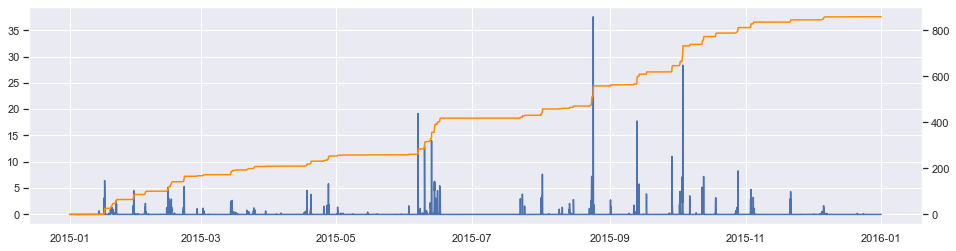

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#++++++++++ Personalisation
txt_file = '../Lame sur BV/lames horaires Laye BV total - 2015.txt'

#++++++++++ Construction d'un dataframe pour faciliter la manipulation des lames horaires
df = pd.DataFrame(data=results, columns=['AAAAMMJJHH', 'Pluie'])
#df['Pluie'] = pd.to_numeric(df['Pluie'])
df['Date'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')
df.set_index(keys='Date', inplace=True, drop=True)

#++++++++++ Fichier de sortie des lames horaires
df.to_csv(txt_file, header=True, index=False, sep=";")

#++++++++++ Calcul du cumul horaire
print('Cumul total (mm):', df['Pluie'].sum())
df['Cumul'] = df['Pluie'].cumsum()

#++++++++++ Graphique des lames horaires
sns.set()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot()
ax.plot(df['Pluie'])
ax2 = ax.twinx()
ax2.plot(df['Cumul'], color="darkorange")
ax2.grid(b=None)
plt.savefig(os.path.splitext(txt_file)[0] + '.png', dpi=300)